# Ex04 - Filtragem de Imagens

 convolução discreta é uma ferramenta utilizada para construir qualquer filtro linear ou de deslocamento. 

**Filtros suavizantes:** são aqueles que removem a nitidez da imagem fazendo uma média, aritmética ou ponderada, na janela do núcleo. O filtro ponderado suavizante mais comum é o da gaussiana. Filtros suavizantes são muito utilizados para eliminar ruído de uma imagem.

**Filtros aguçantes:** são aqueles que realçam as bordas da imagem. Um dos filtros aguçantes mais comum é o Sobel (https://en.wikipedia.org/wiki/Sobel_operator).

Veja mais no notebook sobre [Filtragem no domínio espacial](07 Filtragem no domínio espacial.ipynb)

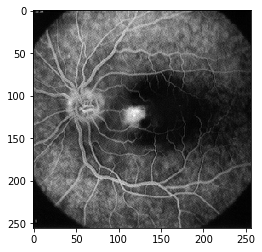

In [2]:
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from PIL import Image

import sys,os
ia898path = os.path.abspath('../../')
if ia898path not in sys.path:
    sys.path.append(ia898path)
import ia898.src as ia

%matplotlib inline
f = mpimg.imread('../data/retina.tif')  
plt.imshow(f,cmap='gray')

### Exercício 1

Entenda o uso da função numpy.convolve e experimente usá-la para entender o filtro da média. Sugestões:
- comece com uma imagem numérica pequena e depois use a imagem da retina
- faça experimentos variando o tamanho da máscara do filtro e compare as imagens resultantes
- varie também o modos da função, explicando as diferenças encontradas
- compare os resultados obtidos pela função numpy.convolve com a filtragem usando a função conv da toolbox ia898

Vamos gerar uma imagem pequena para fazer os testes com a convolução. Para isso, voltamos a recorrer à função  geradora de tabuleiros de xadrez:

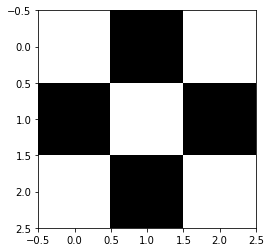

In [3]:
def print_xadrez(dim):
    
    a = np.zeros(dim*dim).reshape(dim,dim)
    
    
    a[::2,::2] = 1
    a[1::2,1::2] = 1
    
    
    #print(a)   
    #plt.imshow(a,'gray')
    
    return a
    
img = print_xadrez(3)

plt.imshow(img,'gray')

Vamos fazer a convolução da imagem do tabuleiro com um vetor-linha de tamanho 25. Aqui, exploraremos os três modos da função **np.convolve**, que segue a seguinte expressão, para dois vetores a[n] e v[n]:


$ C[n] = a[n] * v[n] = \sum_{m=-\infty}^{\infty} a[m]v[n-m] $

O exemplo a seguir fará a  convolução do tabuleiro de xadrez com um vetor gerado por **np.arange**, com valores variando entre 0 e 25.

Serão utilizados os três tipos de convolução disponíveis em **np.convolve**, *full* (retorna a convolução em cada ponto de sobreposição), *same* (o tamanho do vetor de saída será igual ao tamanho do maior vetor), e *valid* (produto só é realizado em pontos os quais os vetores se sobrepoem completamente). Note que, para que seja possível utilizar **np.convolve**, é necessário tornar o vetor unidimensional. Para tanto, utilizaremos o método **flatten()** :

In [4]:
#testando flatten
a = np.array([[1,2,3],[4,5,6],[7,8,9]])
print(a)
print(a.flatten())

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[1 2 3 4 5 6 7 8 9]


In [5]:
print("xadrez: \n",img,"\n")

a = img.flatten()
print("vetor unidimensional: \n",a,"\n")

v = np.arange(25)

C1 = np.convolve(a,v,'full')
print("Vetor C1: \n",C1,"\n")
print("Tamanho: ",C1.shape)

C2 = np.convolve(a,v,'same')
print("Vetor C2: \n",C2,"\n")
print("Tamanho: ",C2.shape)


C3 = np.convolve(a,v,'valid')
print("Vetor C3: \n",C3,"\n")
print("Tamanho: ",C3.shape)

xadrez: 
 [[1. 0. 1.]
 [0. 1. 0.]
 [1. 0. 1.]] 

vetor unidimensional: 
 [1. 0. 1. 0. 1. 0. 1. 0. 1.] 

Vetor C1: 
 [  0.   1.   2.   4.   6.   9.  12.  16.  20.  25.  30.  35.  40.  45.
  50.  55.  60.  65.  70.  75.  80.  85.  90.  95. 100.  80.  84.  63.
  66.  44.  46.  23.  24.] 

Tamanho:  (33,)
Vetor C2: 
 [  6.   9.  12.  16.  20.  25.  30.  35.  40.  45.  50.  55.  60.  65.
  70.  75.  80.  85.  90.  95. 100.  80.  84.  63.  66.] 

Tamanho:  (25,)
Vetor C3: 
 [ 20.  25.  30.  35.  40.  45.  50.  55.  60.  65.  70.  75.  80.  85.
  90.  95. 100.] 

Tamanho:  (17,)


Dos resultados acima, notamos que a utilização do parâmetro **full** na função produz um resultado de tamanho  igual à soma das dimensões dos dois arrays. Com o parâmetro **same** , a dimensão é o tamanho do maior array (no nosso caso, 25). E por último, usando **valid**, o tamanho é dado por (diferença das dimensões +1), que no nosso caso é igual a (25-9)+1=17. Em seguida, vamos exibir a imagem proveniente do vetor obtido através do parâmetro **same**

[[  6.   9.  12.  16.  20.]
 [ 25.  30.  35.  40.  45.]
 [ 50.  55.  60.  65.  70.]
 [ 75.  80.  85.  90.  95.]
 [100.  80.  84.  63.  66.]]


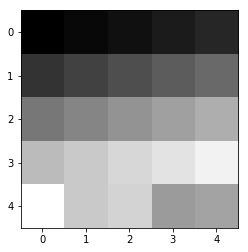

In [6]:
img2 = C2.reshape(5,5)
plt.imshow((img2),'gray')
print(C2.reshape(5,5))

Agora, vamos fazer a convolução das mesmas imagens, mas utilizando ao invés de **np.convolve** a função de convolução presente na toolbox da disciplina ia898:

kernel=
 [[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]
[[ 0.  1.  2.  4.  6.  3.  4.]
 [ 5.  6. 13. 16. 19. 12.  9.]
 [10. 17. 30. 35. 40. 25. 18.]
 [20. 32. 55. 60. 65. 40. 28.]
 [30. 47. 80. 85. 90. 55. 38.]
 [15. 36. 53. 56. 59. 42. 19.]
 [20. 21. 42. 44. 46. 23. 24.]]


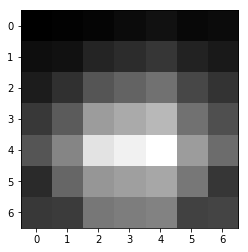

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy import signal

import numpy as np
import sys,os
ia898path = os.path.abspath('../../')
if ia898path not in sys.path:
    sys.path.append(ia898path)
import ia898.src as ia

f = mpimg.imread('../data/retina.tif')
s = 3
k = np.ones((s,s))/(s*s)
print('kernel=\n',k)

fconv = ia.conv(img,v.reshape(5,5))

print(fconv)
plt.imshow(fconv, cmap='gray')

É necessário ressaltar que ** np.convolve ** serve para vetores unidimensionais. Sendo assim, a obtenção de uma figura na saída na forma quadrada não tem muito sentido


Agora, ao invés de fazer a convolução de uma imagem com um array qualquer, utilizaremos o filtro de média. Para tanto, utilizaremos uma função que, dado um array  quadrado, calcula a média dos seus valores:

Temos duas funções a seguir, **kernel_media**, que fornece um kernel para utilização no filtro de média, e ** media_janela  **, que calcula média dos valores  de um array.

In [8]:
def kernel_media(size):

    k = np.ones(size*size).reshape(size,size)
    k = (1/size)*k
    
    return k

def media_janela(array):
    #retorna o valor da  media de um array
    
    n_elem = array.size
    L,C = array.shape
    aux = array/n_elem
      

    return np.sum(aux)

print(kernel_media(3))

print(media_janela(kernel_media(3)))

[[0.33333333 0.33333333 0.33333333]
 [0.33333333 0.33333333 0.33333333]
 [0.33333333 0.33333333 0.33333333]]
0.3333333333333333


### Comparação entre as funções ia.conv e scipy.signal.convolve

Nesta etapa, usaremos a imagem do tabuleiro de xadrez novamente, mas com um tamanho maior (5x5). Dessa forma, será mais fácil de analisar os resultados:

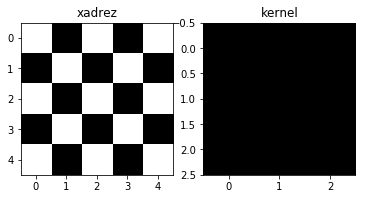

In [9]:
conv_1 = print_xadrez(5)
conv_2 = kernel_media(3)

plt.subplot(1,2,1)
plt.title('xadrez')
plt.imshow(conv_1, 'gray')
plt.subplot(1,2,2)
plt.title('kernel')
plt.imshow(conv_2, 'gray')



Diferença entre fconv-fconv2:
 [[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]


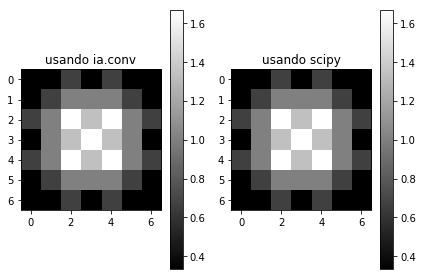

In [10]:
#print(conv_1.shape)
#print(conv_2.shape)


fconv = ia.conv(conv_1,conv_2)

fconv2 = signal.convolve(conv_1,conv_2)
plt.subplot(1,2,1)
plt.title("usando ia.conv")
plt.imshow(fconv, cmap='gray')
plt.colorbar()
#print("fconv: \n",fconv)


plt.subplot(1,2,2)
plt.title("usando scipy")
plt.imshow(fconv2,'gray')
plt.colorbar()
#print("fconv2: \n",fconv2)

plt.tight_layout()


print("Diferença entre fconv-fconv2:\n",fconv-fconv2)

Diferença entre fconv-fconv2:
 [[ 3.99680289e-14  3.90798505e-14  0.00000000e+00 ... -7.99360578e-15
   1.68753900e-14 -7.99360578e-15]
 [ 5.24025268e-14  5.15143483e-14  2.13162821e-14 ...  5.15143483e-14
  -9.76996262e-15  3.55271368e-15]
 [ 1.06581410e-13  5.32907052e-14 -6.39488462e-14 ...  1.01252340e-13
   5.86197757e-14  9.14823772e-14]
 ...
 [ 2.66453526e-14  2.13162821e-14 -7.10542736e-15 ...  1.42108547e-14
   1.77635684e-14  1.95399252e-14]
 [ 5.32907052e-14  3.55271368e-14  7.10542736e-15 ...  0.00000000e+00
   3.19744231e-14  1.77635684e-15]
 [ 6.03961325e-14  5.15143483e-14  2.48689958e-14 ...  6.92779167e-14
   4.79616347e-14  6.39488462e-14]]
arredondando os expoentes para inteiros: 

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


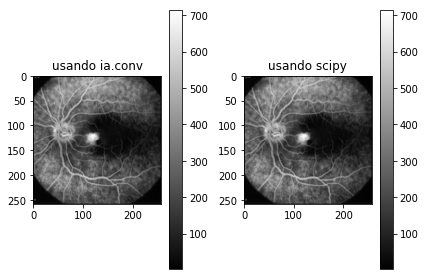

In [11]:
ret = mpimg.imread('../data/retina.tif')  
fconv = ia.conv(ret,conv_2)

fconv2 = signal.convolve(ret,conv_2)
plt.subplot(1,2,1)
plt.title("usando ia.conv")
plt.imshow(fconv, cmap='gray')
plt.colorbar()
#print("fconv: \n",fconv)


plt.subplot(1,2,2)
plt.title("usando scipy")
plt.imshow(fconv2,'gray')
plt.colorbar()
#print("fconv2: \n",fconv2)

plt.tight_layout()


print("Diferença entre fconv-fconv2:\n",(fconv-fconv2))

print("arredondando os expoentes para inteiros: \n")

print((fconv-fconv2).astype('uint8'))

Comparando os resultados obtidos, tanto para a imagem pequena quanto para a imagem da retina, a diferença não é perceptível (note que, no caso da retina, a diferença dos dois vetores possuia valores da ordem de 10^-14, o que é praticamente zero)

Vamos tentar fazer mais testes, mas desta vez variando o tamanho da máscara:

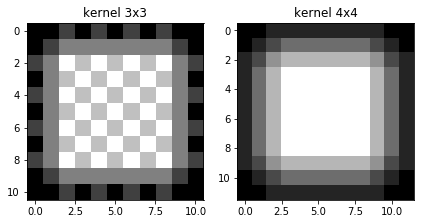

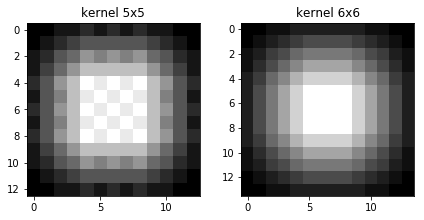

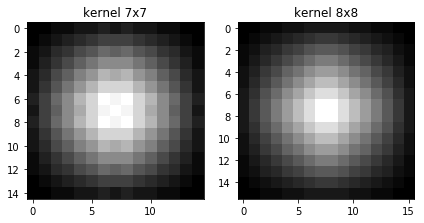

In [12]:
def conv_media(x_size,k_size):
    
    c1 = print_xadrez(x_size)
    c2 = kernel_media(k_size)
    
    
    c_out =  ia.conv(c1,c2)
    plt.imshow(c_out,'gray')
    

plt.figure()
plt.subplot(1,2,1)
conv_media(9,3)
plt.title("kernel 3x3")
plt.tight_layout()

plt.subplot(1,2,2)
conv_media(9,4)
plt.title("kernel 4x4")
plt.tight_layout()

plt.figure()
plt.subplot(1,2,1)
conv_media(9,5)
plt.title("kernel 5x5")
plt.tight_layout()

plt.subplot(1,2,2)
conv_media(9,6)
plt.title("kernel 6x6")
plt.tight_layout()

plt.figure()
plt.subplot(1,2,1)
conv_media(9,7)
plt.title("kernel 7x7")
plt.tight_layout()

plt.subplot(1,2,2)
conv_media(9,8)
plt.title("kernel 8x8")
plt.tight_layout()


Façamos agora o mesmo procedimento, mas desta vez utilizando a figura da retina:

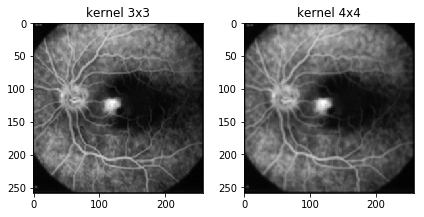

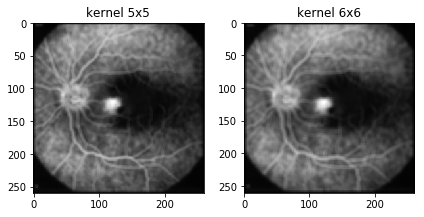

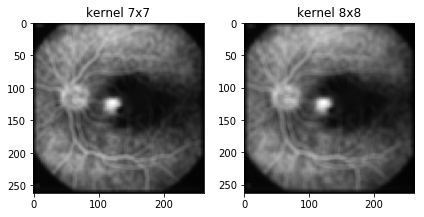

In [13]:
def conv_media2(x_size,k_size):
    
    c1 = Image.open('../data/retina.tif')  
    c2 = kernel_media(k_size)
    
    
    c_out =  ia.conv(c1,c2)
    plt.imshow(c_out,'gray')
    

plt.figure()
plt.subplot(1,2,1)
conv_media2(9,3)
plt.title("kernel 3x3")
plt.tight_layout()

plt.subplot(1,2,2)
conv_media2(9,4)
plt.title("kernel 4x4")
plt.tight_layout()

plt.figure()
plt.subplot(1,2,1)
conv_media2(9,5)
plt.title("kernel 5x5")
plt.tight_layout()

plt.subplot(1,2,2)
conv_media2(9,6)
plt.title("kernel 6x6")
plt.tight_layout()

plt.figure()
plt.subplot(1,2,1)
conv_media2(9,7)
plt.title("kernel 7x7")
plt.tight_layout()

plt.subplot(1,2,2)
conv_media2(9,8)
plt.title("kernel 8x8")
plt.tight_layout()


Com a análise da imagem da retina, percebemos que o aumento da máscara do filtro torna o efeito do *blur* maior, com a redução da nitidez da imagem.

### Exercício 2

Explore o filtro Gaussiano. Sugestões:
- teste a propriedade de decomposição das máscaras da convolução, ou seja, crie um filtro gaussiano bi-dimensional (3,3) a partir de 2 filtros unidimensionais (3,1) e (1,3)
- Faça experimentos de filtragem variando os parâmetros do filtro (tamanho da máscara do filtro, a média e o desvio padrão) 
- adicione ruído a uma imagem e depois tente remover o ruído com filtragem

Definição de ia.gaussian:

Generate a d-dimensional Gaussian image.

    g = gaussian(s, mu, cov)
        g: Image.

    s: Image shape. (rows columns)
    mu: Image. Mean vector. n-D point. Point of maximum value.
    cov: Covariance matrix (symmetric and square)
    

g1= [[0.093 0.119 0.093]
 [0.119 0.153 0.119]
 [0.093 0.119 0.093]]


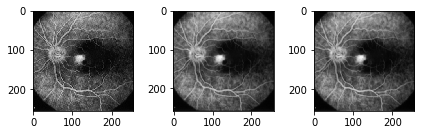

In [14]:
g1 = ia.gaussian((3,3), np.transpose([[1,1]]), [[2,0],[0,2]])
g1 = g1/g1.sum() # normalização
print('g1=', g1.round(3))
G = ia.conv(f,g1)

plt.subplot(1,3,1)
plt.imshow(f,cmap='gray')
plt.subplot(1,3,2)
plt.imshow(G,cmap='gray')
plt.tight_layout()

fgauss = G[1:-1,1:-1] # tratamento de borda
plt.subplot(1,3,3)
plt.imshow(fgauss,cmap='gray')

plt.tight_layout()


In [80]:
g31 = ia.gaussian((3,1), np.transpose([[0,1]]), [[1,0],[0,1]])
print(g31)

g13 = ia.gaussian((1,3), np.transpose([[1,0]]), [[1,0],[0,1]])
print(g13)

g33 = ia.gaussian((3,3), np.transpose([[0,1]]), [[1,0],[0,1]])
print("\n",g33)

print(g31*g13)
print("\n",np.amax(g31*g13))


[[0.09653235]
 [0.05854983]
 [0.01306423]]
[[0.09653235 0.05854983 0.01306423]]

 [[0.09653235 0.15915494 0.09653235]
 [0.05854983 0.09653235 0.05854983]
 [0.01306423 0.02153928 0.01306423]]
[[0.0093185  0.00565195 0.00126112]
 [0.00565195 0.00342808 0.00076491]
 [0.00126112 0.00076491 0.00017067]]

 0.009318495104293077


Vamos criar um filtro a partir de dois filtros unidimensionais.

In [82]:
a1 = np.array([1,3,1])
print(a1)
print("a1: \n", a1.shape)

a2 = a1.copy().reshape(3,1)
print(a2)
print("a2: \n", a2.shape)

a = a1*a2

an = a/a.sum()

print("sem normalizar:\n",a)
print("normalizada: \n",an)

[1 3 1]
a1: 
 (3,)
[[1]
 [3]
 [1]]
a2: 
 (3, 1)
sem normalizar:
 [[1 3 1]
 [3 9 3]
 [1 3 1]]
normalizada: 
 [[0.04 0.12 0.04]
 [0.12 0.36 0.12]
 [0.04 0.12 0.04]]


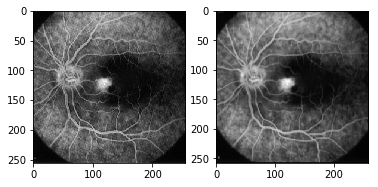

In [90]:
ret1 = Image.open('../data/retina.tif')  

G = ia.conv(ret1, an)


plt.subplot(1,2,1)
plt.imshow(ret1,'gray')


plt.subplot(1,2,2)
plt.imshow(G,'gray')

Aqui aumentamos o tamanho da máscara:

In [85]:
A1 = np.array([1,4,6,4,1])
print(A1)
print("a1: \n", A1.shape)

A2 = A1.copy().reshape(5,1)
print(a2)
print("a2: \n", A2.shape)

A = A1*A2

An = A/A.sum()

print("sem normalizar:\n",A)
print("normalizada: \n",An)


[1 4 6 4 1]
a1: 
 (5,)
[[1]
 [3]
 [1]]
a2: 
 (5, 1)
sem normalizar:
 [[ 1  4  6  4  1]
 [ 4 16 24 16  4]
 [ 6 24 36 24  6]
 [ 4 16 24 16  4]
 [ 1  4  6  4  1]]
normalizada: 
 [[0.00390625 0.015625   0.0234375  0.015625   0.00390625]
 [0.015625   0.0625     0.09375    0.0625     0.015625  ]
 [0.0234375  0.09375    0.140625   0.09375    0.0234375 ]
 [0.015625   0.0625     0.09375    0.0625     0.015625  ]
 [0.00390625 0.015625   0.0234375  0.015625   0.00390625]]


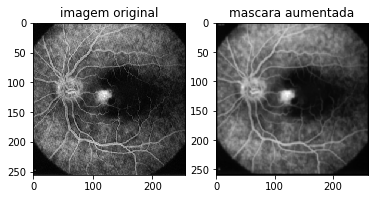

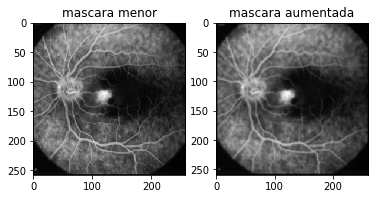

In [97]:
ret1 = Image.open('../data/retina.tif')  

G2 = ia.conv(ret1, An)


plt.subplot(1,2,1)
plt.title('imagem original')
plt.imshow(ret1,'gray')


plt.subplot(1,2,2)
plt.title('mascara aumentada')
plt.imshow(G2,'gray')


plt.figure()

plt.subplot(1,2,1)
plt.title('mascara menor')
plt.imshow(G,'gray')


plt.subplot(1,2,2)
plt.title('mascara aumentada')
plt.imshow(G2,'gray')

In [100]:
def gauss_filter(x,y,sigma):
    
    k = 1/(np.sqrt(2*np.pi)*sigma)
    print(k)
    
    argx = (x**2)/(2*sigma**2)
    argy = (y**2)/(2*sigma**2)
    
    gx = k*np.exp(-argx)
    
    gy = k*np.exp(-argy)

    
    
    return gx*gy

a1f = a1.astype('float64')
print(a1f)
a2f = a2.astype('float64')
print(a2f)

gauss_filter(a2f,a1f,1)



[1. 3. 1.]
[[1.]
 [3.]
 [1.]]
0.3989422804014327


array([[5.85498315e-02, 1.07237757e-03, 5.85498315e-02],
       [1.07237757e-03, 1.96412803e-05, 1.07237757e-03],
       [5.85498315e-02, 1.07237757e-03, 5.85498315e-02]])

0.3989422804014327


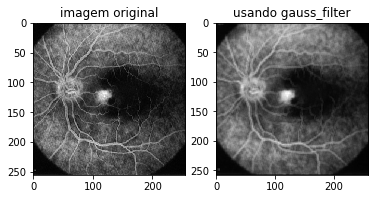

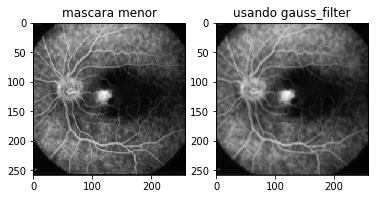

In [106]:
mask = gauss_filter(a2f,a1f,1)

G3 = ia.conv(ret1,mask)




plt.subplot(1,2,1)
plt.title('imagem original')
plt.imshow(ret1,'gray')


plt.subplot(1,2,2)
plt.title('usando gauss_filter')
plt.imshow(G3,'gray')

plt.figure()
plt.subplot(1,2,1)
plt.title('mascara menor')
plt.imshow(G,'gray')


plt.subplot(1,2,2)
plt.title('usando gauss_filter')
plt.imshow(G3,'gray')